In [1]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [2]:
additional_drop = [221, 325, 2304, 1184, 1408, 1984, 1976, 1506, 525, 1531, 746, 2000, 1053, 1328, 2114, 94, 929, 
                  2134, 2287, 1575, 501, 1034, 839, 646, 1602, 2403, 1857]
duplicate_mono_dict = 'dataset/Godess_final_data/mono_dictionary/dict_mono.json'

In [3]:
with open(duplicate_mono_dict, 'r') as f:
    mono_dict = json.load(f)

# find the glycan files to be dropped, set indicator file to -1
ignore_set = []

for key in mono_dict:
    if len(mono_dict[key]) < 5:

        ignore_set.extend(mono_dict[key])

In [4]:
ignore_idx_list = list(set(ignore_set))

ignore_idx_list.extend(additional_drop)

ignore_idx_list = list(set(ignore_idx_list))

ignore_name_list = ['labeled_all_' + str(k) + '.pdb.csv' for k in ignore_idx_list]

In [25]:
len(ignore_name_list)

89

In [5]:
data_dir = 'dataset/Godess_final_data/Godess_data_rev/'

In [6]:
non_mono_list = ['17HOOle', 'Ac', 'Allyl', 'Asn', 'Bu', 'Bz', 'Caf', 'Cho', 
                 'Fer', 'Gallic', 'Gc', 'Mal', 'Me','Missing Monosaccharide', 
                 'P', 'Pr', 'S', 'Ser', 'myoIno', 'pCoum', 'myoIno', 'pCoum']

In [7]:
non_mono_list = [value.lower() for value in non_mono_list]
non_mono_list

['17hoole',
 'ac',
 'allyl',
 'asn',
 'bu',
 'bz',
 'caf',
 'cho',
 'fer',
 'gallic',
 'gc',
 'mal',
 'me',
 'missing monosaccharide',
 'p',
 'pr',
 's',
 'ser',
 'myoino',
 'pcoum',
 'myoino',
 'pcoum']

In [23]:
len(orig_files)

2399

In [28]:
ct_atom = 0
ct_labeled_atom = 0
ct_mono = 0
mono_list = []
ct = 0
all_len = []

result_df = pd.DataFrame()

orig_files = os.listdir(data_dir)
for f in tqdm(orig_files):
    temp_pdb = pd.read_csv(os.path.join(data_dir, f))
    
    ct_atom += len(temp_pdb)
    ct_labeled_atom += np.sum(temp_pdb['shift'] != -1)
    mono_list.extend(list(np.unique(temp_pdb['reformulated_standard_mono'].values)))
    
    df_new = temp_pdb[~temp_pdb['reformulated_standard_mono'].isin(non_mono_list)]
    
    df_mono_table = df_new.loc[:, ['Residual_num', 'reformulated_standard_mono']].drop_duplicates()
    df_mono_table.index = range(len(df_mono_table))
    
    result_df = pd.concat([result_df, df_mono_table])
    
    all_len.append(len(np.unique(temp_pdb['Residual_accurate_name'].values)))
    
    ct_mono += len(np.unique(df_new['Residual_num'].values))
    
    if f not in ignore_name_list:
        temp_out_csv = pd.read_csv(os.path.join(data_dir, f))
        temp_out_csv.to_csv('dataset/Godess_final_data/Godess_data_v2/' + f, index = False)
    
print(ct_atom, ct_labeled_atom, ct_mono)

100%|██████████████████████████████████████| 2399/2399 [00:18<00:00, 130.90it/s]

372958 199695 16030


In [27]:
ct

2310

In [9]:
df_new

,HETATM,Atom_num,Atom_name,Residual_name,Bound,Residual_num,x,y,z,Atom_type,Residual_accurate_name,Lineage,shift,trust,Ac_component,Trust,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF,Me_min_atom_distance,Me_min_atom_distance_threshold,Me_min_atom_path,Ser_atom_distance,Ser_atom_distance_threshold,Ser_atom_path,Ac_min_atom_distance,Ac_min_atom_distance_threshold,Ac_min_atom_path,S_min_atom_distance,S_min_atom_distance_threshold,S_min_atom_path,Gc_min_atom_distance,Gc_min_atom_distance_threshold,Gc_min_atom_path,New_Atom_name,main_ring_shift
5,HETATM,6,C1,FCB,A,2,0.900,0.830,5.219,C,b-D-Fucp,1,98.20,21,0,NaN,b,d,fucp,fuc,P,2,1,"['C1', 'O1', 'C1']",999,2,['No Ser included'],22,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",15,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C1,98.20
6,HETATM,7,O5,FCB,A,2,-0.180,1.692,5.548,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,3,1,"['C1', 'O1', 'C1', 'O5']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O5,-1.00
7,HETATM,8,C5,FCB,A,2,-1.153,1.799,4.497,C,b-D-Fucp,1,71.70,21,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'O5', 'C5']",999,2,['No Ser included'],20,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",13,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C5,71.70
8,HETATM,9,C6,FCB,A,2,-2.190,2.813,4.958,C,b-D-Fucp,1,16.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'O5', 'C5', 'C6']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C6,16.50
9,HETATM,10,C4,FCB,A,2,-1.760,0.419,4.147,C,b-D-Fucp,1,72.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'C4']",999,2,['No Ser included'],19,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",12,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C4,72.50
10,HETATM,11,O4,FCB,A,2,-2.385,-0.152,5.308,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,6,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'C4', 'O4']",999,2,['No Ser included'],18,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",11,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O4,-1.00
11,HETATM,12,C3,FCB,A,2,-0.606,-0.512,3.716,C,b-D-Fucp,1,74.90,21,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'C2', 'C3']",999,2,['No Ser included'],20,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",13,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C3,74.90
12,HETATM,13,O3,FCB,A,2,-1.116,-1.836,3.462,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'O3']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O3,-1.00
13,HETATM,14,C2,FCB,A,2,0.448,-0.595,4.830,C,b-D-Fucp,1,71.70,21,0,NaN,b,d,fucp,fuc,P,3,1,"['C1', 'O1', 'C1', 'C2']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C2,71.70
14,HETATM,15,O2,FCB,A,2,1.588,-1.357,4.372,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'C2', 'O2']",999,2,['No Ser included'],22,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",15,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O2,-1.00


In [10]:
result_df.index = range(len(result_df))

In [11]:
result_df_out = pd.DataFrame(result_df[['reformulated_standard_mono']].value_counts())

In [12]:
result_df_out.reset_index(inplace=True)

In [13]:
result_df_out.to_csv('GODDESS_mono_table_glycan.csv', index = False, header = None)

In [14]:
# df_new.loc[['Residual_num', 'reformulated_standard_mono']]

In [15]:
result_df_out

,reformulated_standard_mono,0
0,glc,3023
1,gal,2806
2,glcn,1953
3,fuc,1940
4,xyl,1364
5,man,998
6,glca,992
7,gala,880
8,mana,829
9,neu,647


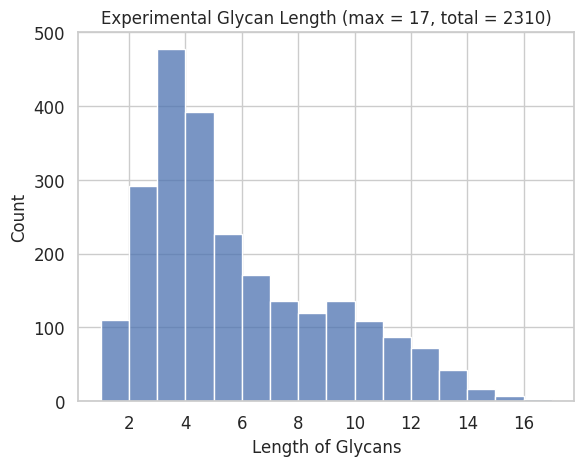

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", font_scale=1)

sns.histplot(all_len, binwidth=1)

plt.xlabel('Length of Glycans')
plt.title('Experimental Glycan Length (max = 17, total = 2310)')
plt.tick_params(labelsize=12)
plt.savefig('figures/glycan_length_experimental.png', dpi=300)
plt.show()


In [17]:
df_new

,HETATM,Atom_num,Atom_name,Residual_name,Bound,Residual_num,x,y,z,Atom_type,Residual_accurate_name,Lineage,shift,trust,Ac_component,Trust,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF,Me_min_atom_distance,Me_min_atom_distance_threshold,Me_min_atom_path,Ser_atom_distance,Ser_atom_distance_threshold,Ser_atom_path,Ac_min_atom_distance,Ac_min_atom_distance_threshold,Ac_min_atom_path,S_min_atom_distance,S_min_atom_distance_threshold,S_min_atom_path,Gc_min_atom_distance,Gc_min_atom_distance_threshold,Gc_min_atom_path,New_Atom_name,main_ring_shift
5,HETATM,6,C1,FCB,A,2,0.900,0.830,5.219,C,b-D-Fucp,1,98.20,21,0,NaN,b,d,fucp,fuc,P,2,1,"['C1', 'O1', 'C1']",999,2,['No Ser included'],22,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",15,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C1,98.20
6,HETATM,7,O5,FCB,A,2,-0.180,1.692,5.548,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,3,1,"['C1', 'O1', 'C1', 'O5']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O5,-1.00
7,HETATM,8,C5,FCB,A,2,-1.153,1.799,4.497,C,b-D-Fucp,1,71.70,21,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'O5', 'C5']",999,2,['No Ser included'],20,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",13,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C5,71.70
8,HETATM,9,C6,FCB,A,2,-2.190,2.813,4.958,C,b-D-Fucp,1,16.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'O5', 'C5', 'C6']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C6,16.50
9,HETATM,10,C4,FCB,A,2,-1.760,0.419,4.147,C,b-D-Fucp,1,72.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'C4']",999,2,['No Ser included'],19,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",12,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C4,72.50
10,HETATM,11,O4,FCB,A,2,-2.385,-0.152,5.308,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,6,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'C4', 'O4']",999,2,['No Ser included'],18,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",11,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O4,-1.00
11,HETATM,12,C3,FCB,A,2,-0.606,-0.512,3.716,C,b-D-Fucp,1,74.90,21,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'C2', 'C3']",999,2,['No Ser included'],20,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",13,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C3,74.90
12,HETATM,13,O3,FCB,A,2,-1.116,-1.836,3.462,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'O3']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O3,-1.00
13,HETATM,14,C2,FCB,A,2,0.448,-0.595,4.830,C,b-D-Fucp,1,71.70,21,0,NaN,b,d,fucp,fuc,P,3,1,"['C1', 'O1', 'C1', 'C2']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C2,71.70
14,HETATM,15,O2,FCB,A,2,1.588,-1.357,4.372,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'C2', 'O2']",999,2,['No Ser included'],22,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",15,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O2,-1.00


In [18]:
pd.DataFrame(all_len).to_csv('GODDESS_glycan_length.csv', index = False, header = None)

In [19]:
np.max(all_len)

17

In [20]:
np.unique(mono_list)

array(['17hoole', '3,6anhgal', 'ac', 'allyl', 'api', 'ara', 'ara-ol',
       'asn', 'bu', 'bz', 'caf', 'cho', 'fer', 'fru', 'fuc', 'fucn',
       'gal', 'gal-ol', 'gala', 'gallic', 'galn', 'galna', 'gc', 'glc',
       'glc-ol', 'glca', 'glcn', 'glcn-ol', 'glcna', 'gula', 'ido',
       'idoa', 'kdo', 'kdo-ol', 'lyx', 'mal', 'man', 'mana', 'mann', 'me',
       'missing monosaccharide', 'myoino', 'neu', 'p', 'pcoum', 'pr',
       'qui', 'qui3n', 'qui4n', 'quin', 'rha', 'rha4n', 'rhan', 'rib',
       'rib-ol', 's', 'ser', 'tal', 'xyl'], dtype='<U22')

In [21]:
temp_pdb

,HETATM,Atom_num,Atom_name,Residual_name,Bound,Residual_num,x,y,z,Atom_type,Residual_accurate_name,Lineage,shift,trust,Ac_component,Trust,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF,Me_min_atom_distance,Me_min_atom_distance_threshold,Me_min_atom_path,Ser_atom_distance,Ser_atom_distance_threshold,Ser_atom_path,Ac_min_atom_distance,Ac_min_atom_distance_threshold,Ac_min_atom_path,S_min_atom_distance,S_min_atom_distance_threshold,S_min_atom_path,Gc_min_atom_distance,Gc_min_atom_distance_threshold,Gc_min_atom_path,New_Atom_name,main_ring_shift
0,HETATM,1,C1,MOH,A,1,1.329,0.605,7.563,C,Me,NaN,-1.00,84,0,NaN,missing_a_b,missing_L_D,me,me,missing_carbon_number,0,0,['C1'],999,2,['No Ser included'],24,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",17,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C1,-1.00
1,HETATM,2,O1,MOH,A,1,1.884,0.762,6.264,O,Me,NaN,-1.00,-1,0,NaN,missing_a_b,missing_L_D,me,me,missing_carbon_number,0,0,"['C1', 'O1']",999,2,['No Ser included'],23,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",16,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O1,-1.00
2,HETATM,3,H1,MOH,A,1,2.155,0.502,8.272,H,Me,NaN,-1.00,98,0,NaN,missing_a_b,missing_L_D,me,me,missing_carbon_number,0,0,"['C1', 'H1']",999,2,['No Ser included'],25,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",18,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],H1,-1.00
3,HETATM,4,H11,MOH,A,1,0.709,-0.293,7.630,H,Me,NaN,-1.00,-1,0,NaN,missing_a_b,missing_L_D,me,me,missing_carbon_number,0,0,"['C1', 'H11']",999,2,['No Ser included'],25,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",18,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],H11,-1.00
4,HETATM,5,H12,MOH,A,1,0.749,1.488,7.847,H,Me,NaN,-1.00,-1,0,NaN,missing_a_b,missing_L_D,me,me,missing_carbon_number,0,0,"['C1', 'H12']",999,2,['No Ser included'],25,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",18,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],H12,-1.00
5,HETATM,6,C1,FCB,A,2,0.900,0.830,5.219,C,b-D-Fucp,1,98.20,21,0,NaN,b,d,fucp,fuc,P,2,1,"['C1', 'O1', 'C1']",999,2,['No Ser included'],22,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",15,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C1,98.20
6,HETATM,7,O5,FCB,A,2,-0.180,1.692,5.548,O,b-D-Fucp,1,-1.00,-1,0,NaN,b,d,fucp,fuc,P,3,1,"['C1', 'O1', 'C1', 'O5']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],O5,-1.00
7,HETATM,8,C5,FCB,A,2,-1.153,1.799,4.497,C,b-D-Fucp,1,71.70,21,0,NaN,b,d,fucp,fuc,P,4,1,"['C1', 'O1', 'C1', 'O5', 'C5']",999,2,['No Ser included'],20,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",13,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C5,71.70
8,HETATM,9,C6,FCB,A,2,-2.190,2.813,4.958,C,b-D-Fucp,1,16.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'O5', 'C5', 'C6']",999,2,['No Ser included'],21,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",14,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C6,16.50
9,HETATM,10,C4,FCB,A,2,-1.760,0.419,4.147,C,b-D-Fucp,1,72.50,21,0,NaN,b,d,fucp,fuc,P,5,2,"['C1', 'O1', 'C1', 'C2', 'C3', 'C4']",999,2,['No Ser included'],19,2,"['C11', 'N2', 'C2', 'C1', 'O4', 'C4', 'C5', 'O...",12,2,"['S1', 'O6', 'C6', 'C5', 'O5', 'C1', 'O4', 'C4...",999,2,['No _Gc_ included'],C4,72.50
